In [1]:
from models.tf_idf import TFIDFClassifier
from model_evaluation import ModelEvalWrapper, ModelEvaluator, ModelEvalWrapperInterface, ModelReport, ReportsComparison
from data_loader import AnnotationDataLoader
from models.fine_tuned_BERT_models.classifier import BERTBasedModel
from models.regex import RegexModel
import pandas as pd

from models.config import PMB_DIR, BERT_DIR

c:\Users\milap\Anaconda\envs\llm_test\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
lr = TFIDFClassifier.load_from_file("models/tf_idf/LogisticRegression_TF-IDF.pkl")
svm = TFIDFClassifier.load_from_file("models/tf_idf/SupportVectorClassification_TF-IDF.pkl")
rf = TFIDFClassifier.load_from_file("models/tf_idf/RandomForest_TF-IDF.pkl")
mnb = TFIDFClassifier.load_from_file("models/tf_idf/MultinomialNaiveBayes_TF-IDF.pkl")
cnb = TFIDFClassifier.load_from_file("models/tf_idf/ComplementNaiveBayes_TF-IDF.pkl")

c:\Users\milap\Anaconda\envs\llm_test\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\milap\Anaconda\envs\llm_test\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\milap\Anaconda\envs\llm_test\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.6.1 when us

In [3]:
dataloader = AnnotationDataLoader()

lr_wrapper = ModelEvalWrapper(lr, "Logistic Regression")
lr_m = ModelEvaluator(lr_wrapper, dataloader.get_test())
lr_report = lr_m.generate_report()

svm_wrapper = ModelEvalWrapper(svm, "Support Vector Classifier")
svm_m = ModelEvaluator(svm_wrapper, dataloader.get_test())
svm_report = svm_m.generate_report()

rf_wrapper = ModelEvalWrapper(rf, "Random Forest")
rf_m = ModelEvaluator(rf_wrapper, dataloader.get_test())
rf_report = rf_m.generate_report()

mnb_wrapper = ModelEvalWrapper(mnb, "Multinomial Naive Bayes")
mnb_m = ModelEvaluator(mnb_wrapper, dataloader.get_test())
mnb_report = mnb_m.generate_report()

cnb_wrapper = ModelEvalWrapper(cnb, "Complement Naive Bayes")
cnb_m = ModelEvaluator(cnb_wrapper, dataloader.get_test())
cnb_report = cnb_m.generate_report()

In [4]:
pubmedBERT = BERTBasedModel(PMB_DIR)
regularBERT = BERTBasedModel(BERT_DIR)

pmb_wrapper = ModelEvalWrapper(pubmedBERT, "PubMedBERT Model")
pmb_evaluator = ModelEvaluator(pmb_wrapper, dataloader.get_test())
pmb_report = pmb_evaluator.generate_report()

bert_wrapper = ModelEvalWrapper(regularBERT, "BERT Model")
bert_evaluator = ModelEvaluator(bert_wrapper, dataloader.get_test())
bert_report = bert_evaluator.generate_report()

In [5]:
regex_m = RegexModel()
dataloader = AnnotationDataLoader()

t1 = dataloader.get_train()
t2 = dataloader.get_validation()
t3 = dataloader.get_test()

all = pd.concat([t1, t2, t3])

regex_wrapper = ModelEvalWrapper(regex_m, "RegEx")
regex_evaluator = ModelEvaluator(regex_wrapper, all)
regex_report = regex_evaluator.generate_report()

In [6]:
report_compare = ReportsComparison([lr_report, svm_report, rf_report, mnb_report, cnb_report, pmb_report, bert_report, regex_report])


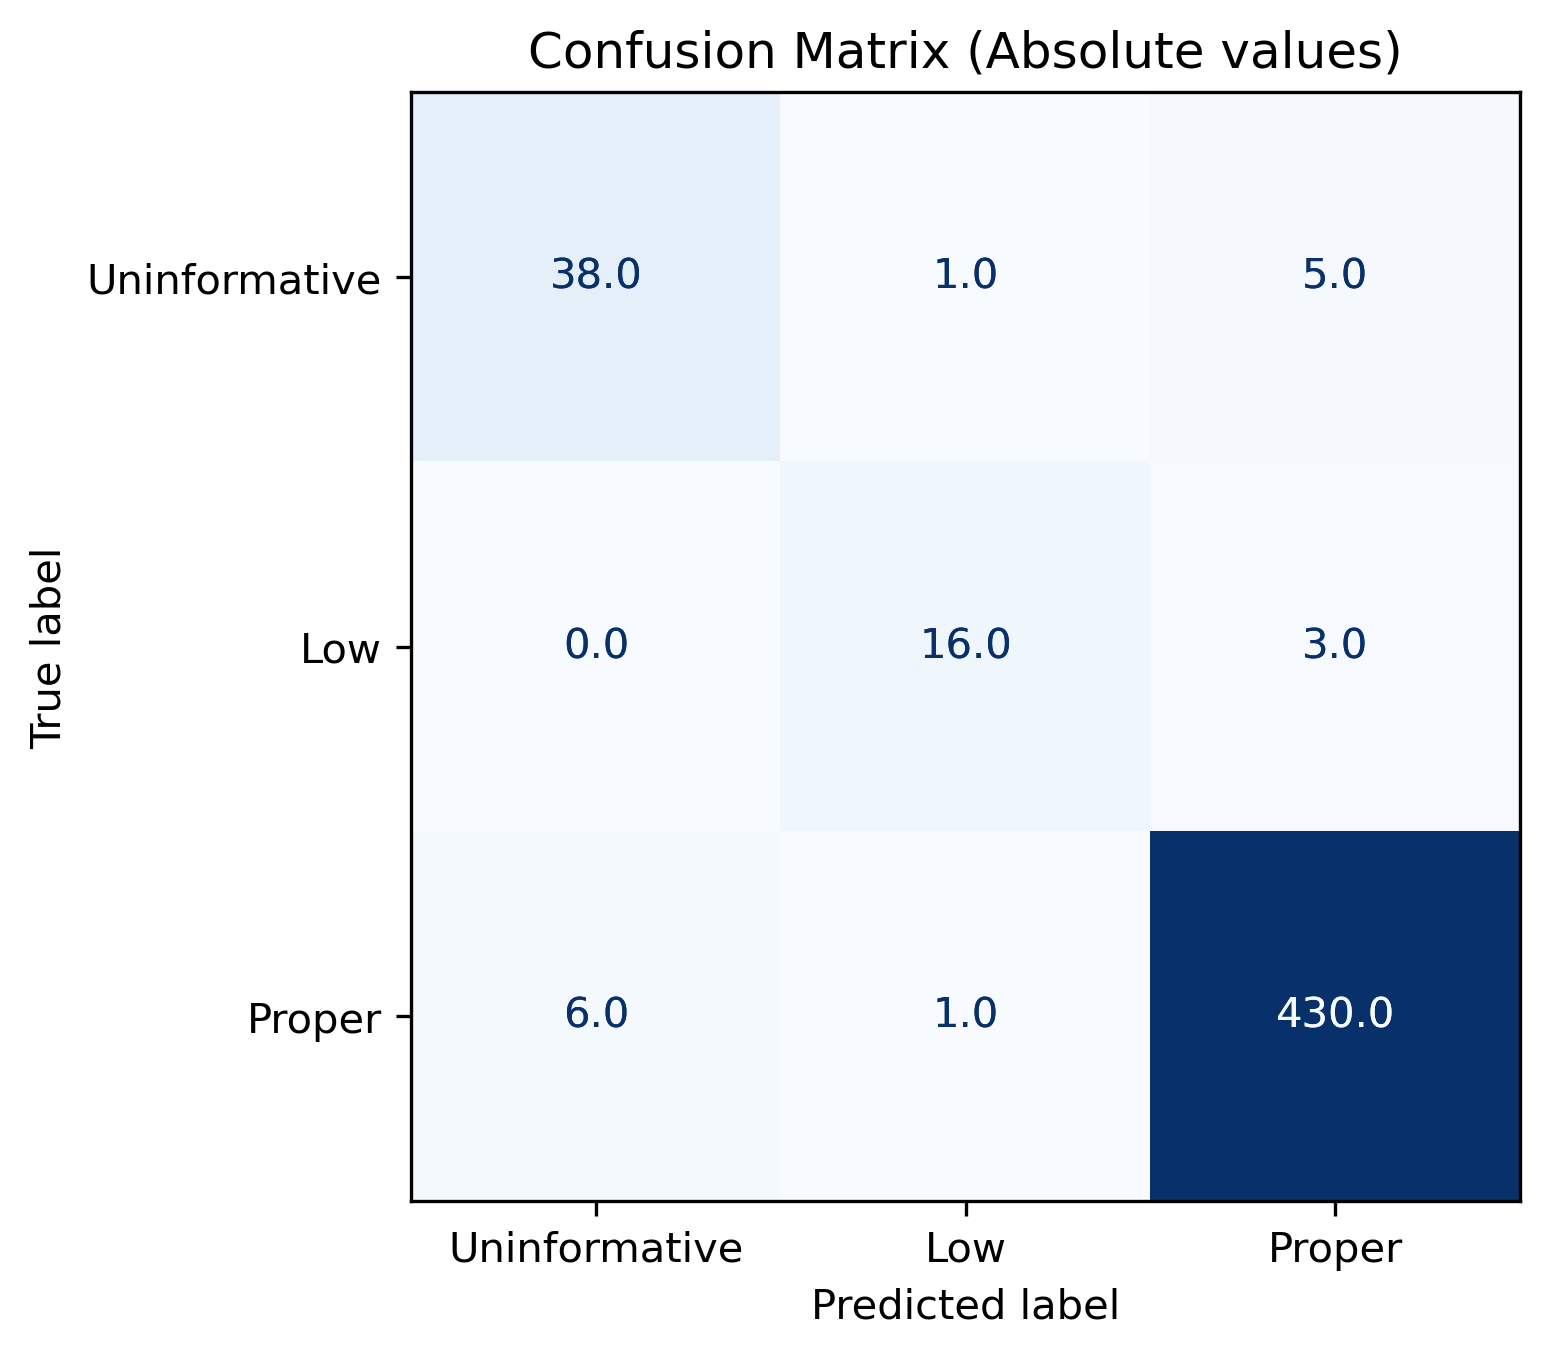
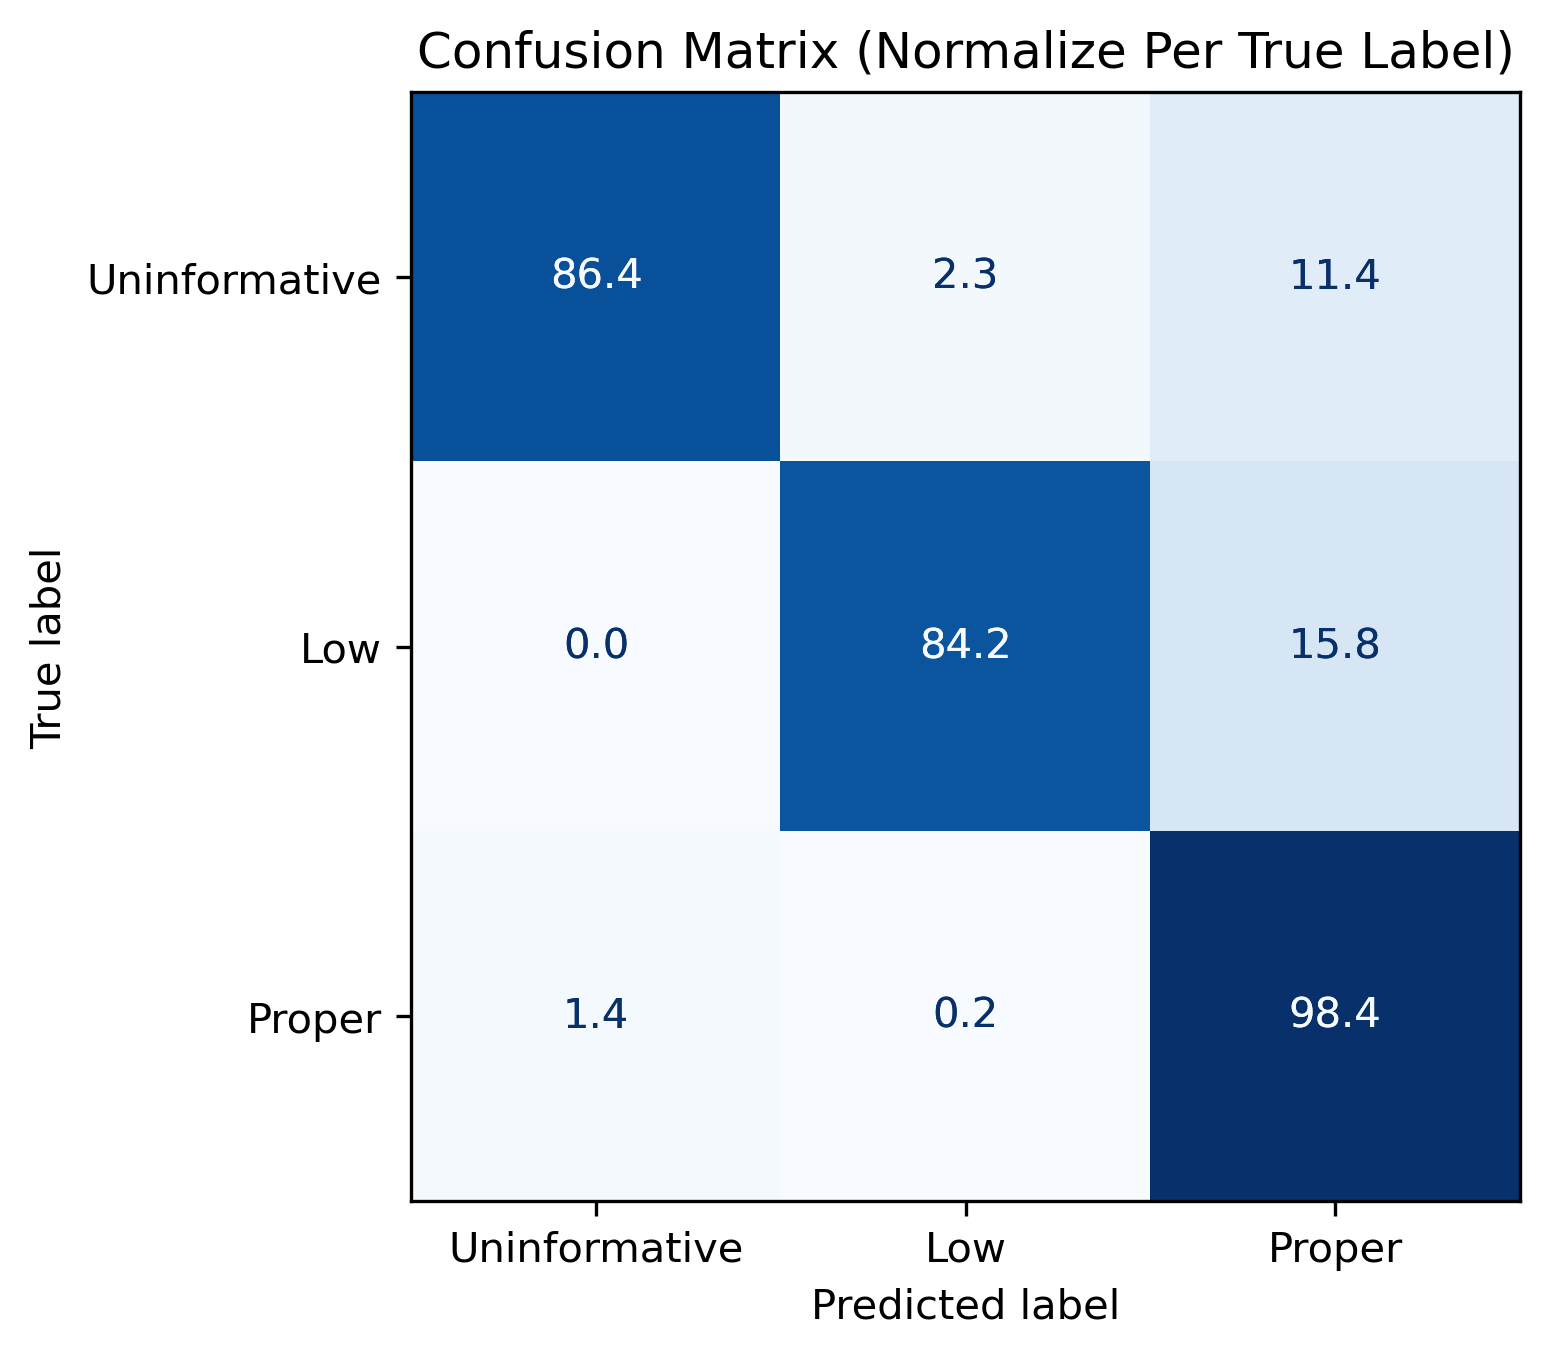

In [10]:
pmb_report.show_report()

In [9]:
report_compare.show_comparison_table()

In [ ]:
report_compare.show_comparison_plot()

[2025-11-05 13:39:50,109] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\Users\milap\Anaconda\envs\llm_test\Lib\site-packages\dash\dash.py", line 1388, in _prepare_callback
    cb = self.callback_map[output]
         ~~~~~~~~~~~~~~~~~^^^^^^^^
KeyError: '..model-metrics-table.columns...model-metrics-table.style_header_conditional..'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\milap\Anaconda\envs\llm_test\Lib\site-packages\flask\app.py", line 1511, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\Users\milap\Anaconda\envs\llm_test\Lib\site-packages\flask\app.py", line 919, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\Users\milap\Anaconda\envs\llm_test\Lib\site-packages\flask\app.py", line 917, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\Users\milap\Anaconda\envs\llm_test\Lib\site-pa

In [8]:
report_compare.get_comparison_df()

,Model,Model_info,Accuracy,Average Time Per Prediction,Macro Average (precision),Macro Average (recall),Macro Average (f1-score),Macro Average (support),Weighted Average (precision),Weighted Average (recall),Weighted Average (f1-score),Weighted Average (support)
0,Logistic Regression,,0.888,0.005658,0.665342,0.703557,0.672644,500.0,0.896914,0.888,0.890792,500.0
1,Support Vector Classifier,,0.890,0.005373,0.672042,0.727914,0.685385,500.0,0.901680,0.890,0.893893,500.0
2,Random Forest,,0.804,0.005828,0.567434,0.755929,0.600625,500.0,0.893920,0.804,0.837046,500.0
3,Multinomial Naive Bayes,,0.904,0.005313,0.739273,0.672439,0.681330,500.0,0.910032,0.904,0.901150,500.0
4,Complement Naive Bayes,,0.890,0.005241,0.656103,0.823296,0.714657,500.0,0.924046,0.890,0.901803,500.0
5,PubMedBERT Model,,0.968,0.013243,0.911420,0.896574,0.903786,500.0,0.967814,0.968,0.967882,500.0
6,BERT Model,,0.966,0.020704,0.958538,0.828687,0.879554,500.0,0.966144,0.966,0.964360,500.0


In [9]:
cnb_report.show_misclassified_samples()

,protein_annotation,true_label,predicted_label
22,6PF2K domain-containing protein,2,1
23,Lztr1 protein,2,0
31,Uncharacterized protein DUF3987,1,0
32,WEB family protein,2,1
45,WD repeat-containing protein,2,1
48,ASPH,2,0
62,Putative membrane proteins,1,2
93,Putative gp22,0,2
95,HMCN,2,0
102,Putative gpG protein,0,2
